In [151]:
   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [152]:
# Load your temperature dataset with columns "Date" and "Temperature"
data = pd.read_csv("AirPassengers.csv")
 
# Make sure your "Date" column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])
 
# Sorting the data by date (if not sorted)
data = data.sort_values(by='Month')
 

In [153]:
# # Resetting the index
data.set_index('Month', inplace=True)
 
data.dropna(inplace=True)

In [154]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


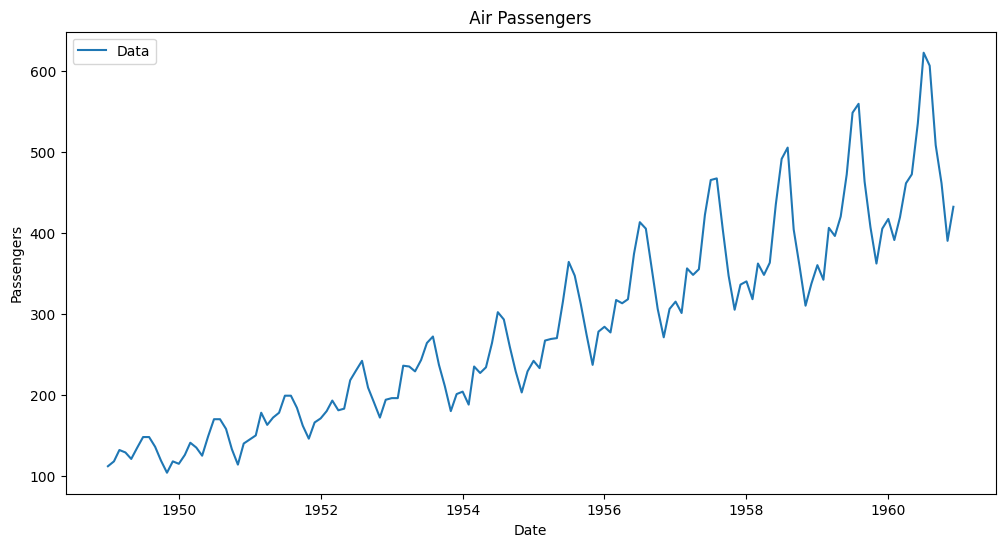

In [155]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['#Passengers'], label='Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.title(' Air Passengers ')
plt.show()


<Figure size 2000x2000 with 0 Axes>

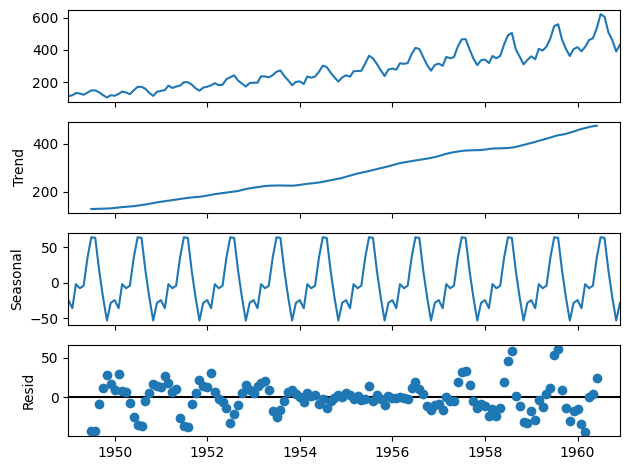

In [156]:

result = seasonal_decompose(data, model='additive', period=12)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()

In [157]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	data[f'Lag_{i}'] = data['#Passengers'].shift(i)

# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']


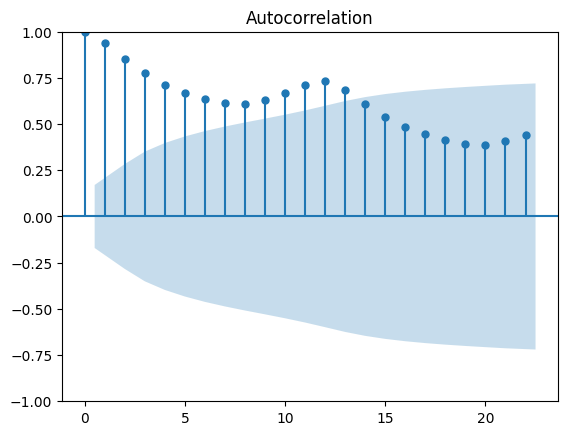

In [158]:
from statsmodels.graphics.tsaplots import plot_acf
series = data['#Passengers']
plot_acf(series)
plt.show()

In [159]:
# check the correlation of the lagged values
data['#Passengers'].corr(data['#Passengers'].shift(12))


0.989025566283191

In [160]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 

## Autoregression

In [161]:
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)
 
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12


C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [163]:
test_data

,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Month,,,,,,,,,,,,,
1958-10-01,359,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0,347.0
1958-11-01,310,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0,305.0
1958-12-01,337,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0,336.0
1959-01-01,360,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0,340.0
1959-02-01,342,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0,318.0
1959-03-01,406,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0,362.0
1959-04-01,396,406.0,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0,348.0
1959-05-01,420,396.0,406.0,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0,363.0
1959-06-01,472,420.0,396.0,406.0,342.0,360.0,337.0,310.0,359.0,404.0,505.0,491.0,435.0


## Moving Average

In [164]:
df = pd.read_csv("AirPassengers.csv",  index_col='Month',
                       parse_dates=True)


In [165]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [166]:
from scipy.ndimage import uniform_filter1d

# Extract 'Close' column and convert to DataFrame
df = df['#Passengers'].to_frame()
 
# Calculate 12-day Simple Moving Average (SMA)
df['SMA3'] = df['#Passengers'].rolling(3).mean()
 
# Remove NULL values
df.dropna(inplace=True)
 
moving_avrage = uniform_filter1d
# Print DataFrame
df

,#Passengers,SMA3
Month,,
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
1949-06-01,135,128.333333
1949-07-01,148,134.666667
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


<Axes: xlabel='Month'>

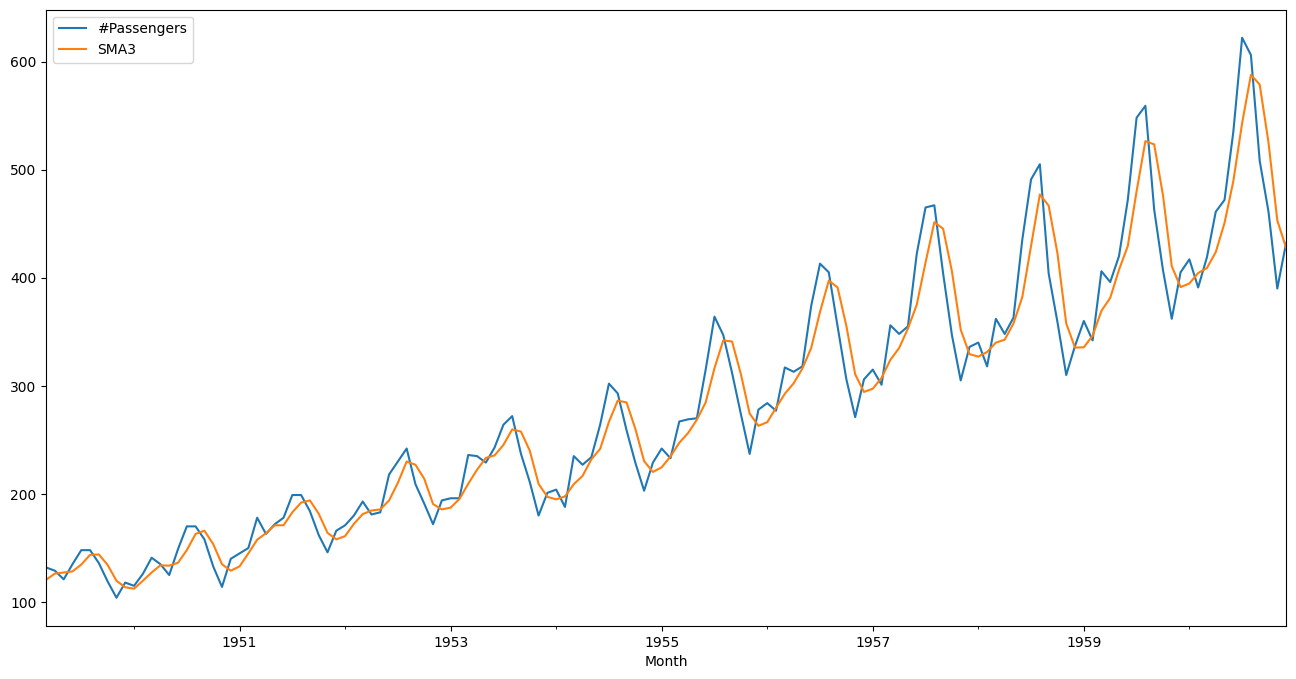

In [167]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
df[['#Passengers', 'SMA3']].plot(label='RELIANCE', 
                                  figsize=(16, 8))

In [168]:
# Calculate 12-day Simple Moving Average (SMA)
df['SMA12'] = df['#Passengers'].rolling(12).mean()
 
# Remove NULL values
df.dropna(inplace=True)
 
# Print DataFrame
df

,#Passengers,SMA3,SMA12
Month,,,
1950-02-01,126,119.666667,127.583333
1950-03-01,141,127.333333,128.333333
1950-04-01,135,134.000000,128.833333
1950-05-01,125,133.666667,129.166667
1950-06-01,149,136.333333,130.333333
...,...,...,...
1960-08-01,606,587.666667,463.333333
1960-09-01,508,578.666667,467.083333
1960-10-01,461,525.000000,471.583333


<Axes: xlabel='Month'>

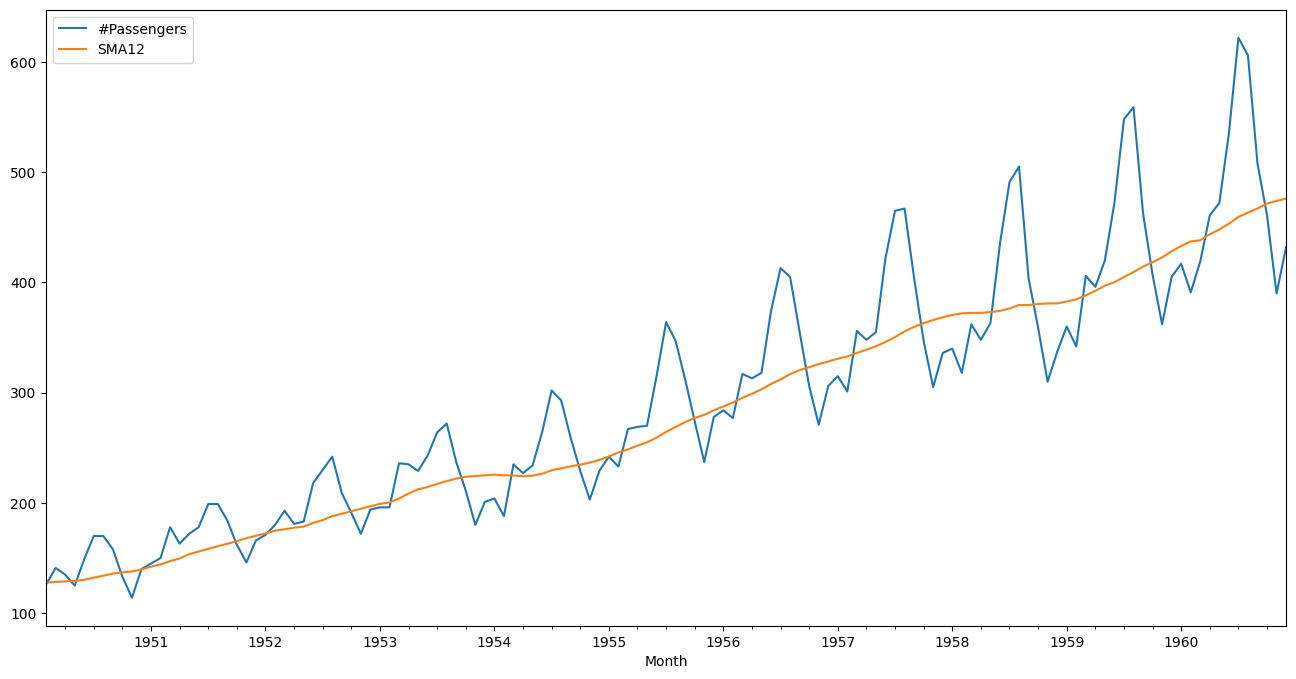

In [169]:
df[['#Passengers', 'SMA12']].plot(label='DF', 
                                  figsize=(16, 8))

In [170]:

from scipy.ndimage import uniform_filter1d

# Create a sample array

# Calculate the moving average with a window size of 3
moving_average = uniform_filter1d(data, size=3)

print(moving_average)


[[116.         112.33333333 113.66666667 ... 126.33333333 120.66666667
  114.        ]
 [122.33333333 119.66666667 112.33333333 ... 127.33333333 126.33333333
  122.66666667]
 [136.         127.33333333 119.66666667 ... 128.33333333 127.33333333
  131.        ]
 ...
 [476.66666667 525.         578.66666667 ... 394.66666667 391.33333333
  392.        ]
 [413.66666667 453.         525.         ... 404.33333333 394.66666667
  376.33333333]
 [418.         427.66666667 453.         ... 409.         404.33333333
  409.        ]]


<Axes: xlabel='Month'>

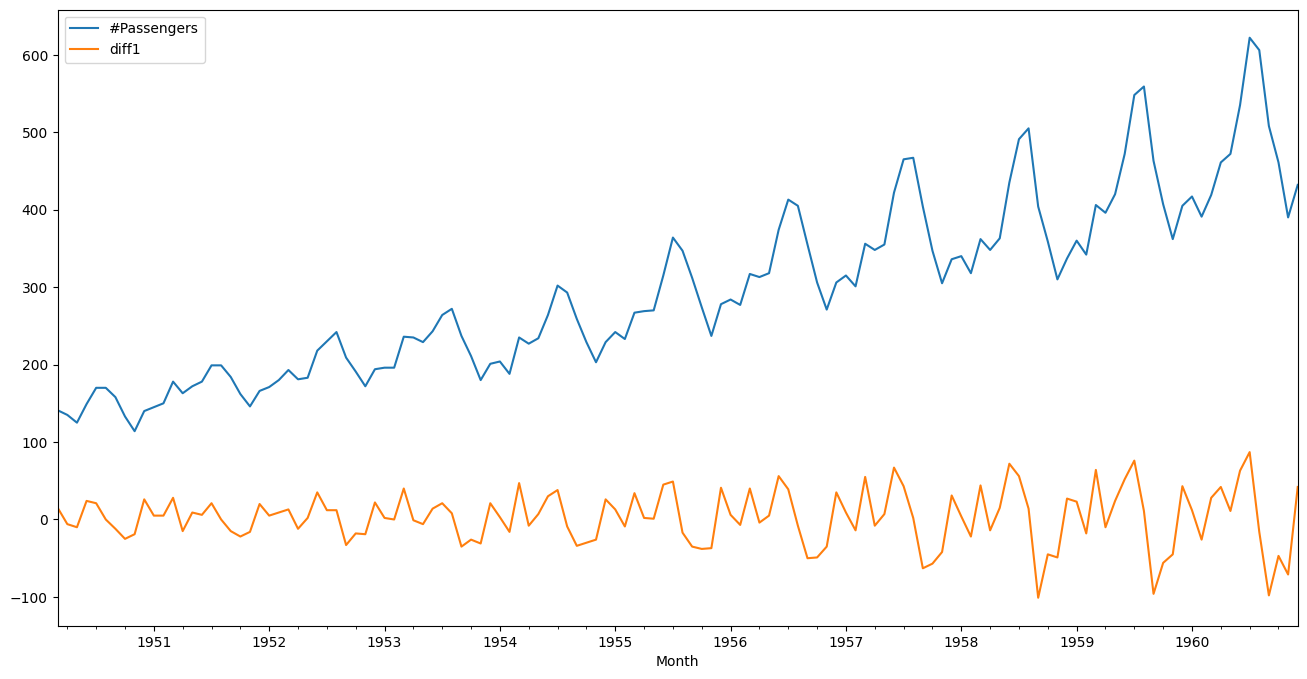

In [171]:
# diff1 
df['diff1'] = df['#Passengers'] - df['#Passengers'].shift(1)
# or using diff function 
df.dropna(inplace=True)
df[['#Passengers', 'diff1']].plot(label='DF', 
                                  figsize=(16, 8))

## ARIMA

In [172]:
from statsmodels.tsa.arima.model import ARIMA


In [173]:
df = pd.read_csv('AirPassengers.csv')
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)

df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


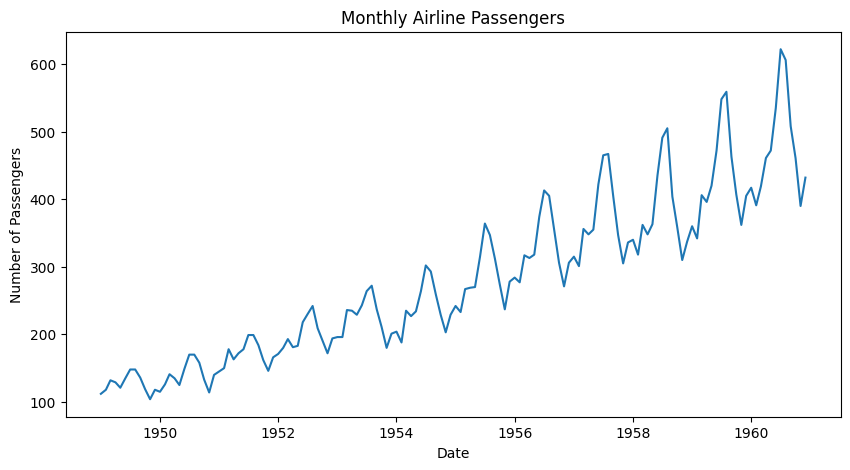

In [174]:
# Plot the dataset
plt.figure(figsize=(10, 5))
plt.plot(df)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [175]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [176]:
from statsmodels.tsa.stattools import adfuller

In [177]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
ADF Statistic: -2.8865058565449697
p-value: 0.04693983572510763


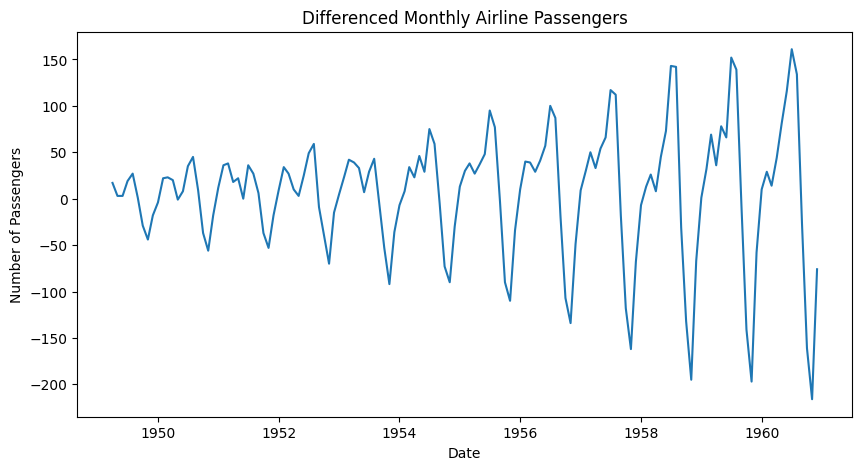

In [178]:
# Check for stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = df.diff(3).dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [179]:
# Fit the ARMA(1, 1) model
model = ARIMA(airline_data_diff, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  141
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -724.470
Date:                Tue, 23 Jul 2024   AIC                           1456.939
Time:                        11:48:37   BIC                           1468.734
Sample:                    04-01-1949   HQIC                          1461.732
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5482     13.428      0.488      0.626     -19.770      32.867
ar.L1          0.5059      0.055      9.200      0.000       0.398       0.614
ma.L1          0.6145      0.083      7.389      0.0

In [180]:
# Fit the ARIMA(1, 1, 0) model
model = ARIMA(y_train, order=(17, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\71518\AppData\Roaming\Python\Python312\site-pa

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:               ARIMA(17, 2, 14)   Log Likelihood                -413.618
Date:                Tue, 23 Jul 2024   AIC                            891.237
Time:                        11:48:40   BIC                            978.513
Sample:                    01-01-1949   HQIC                           926.653
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8442      0.780     -1.082      0.279      -2.374       0.685
ar.L2         -0.4806      0.633     -0.759      0.448      -1.722       0.760
ar.L3         -0.4662      0.487     -0.958      0.3

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')

Mean Absolute Error: 22.95
Root Mean Squared Error: 27.27
R Squared Error: 0.88


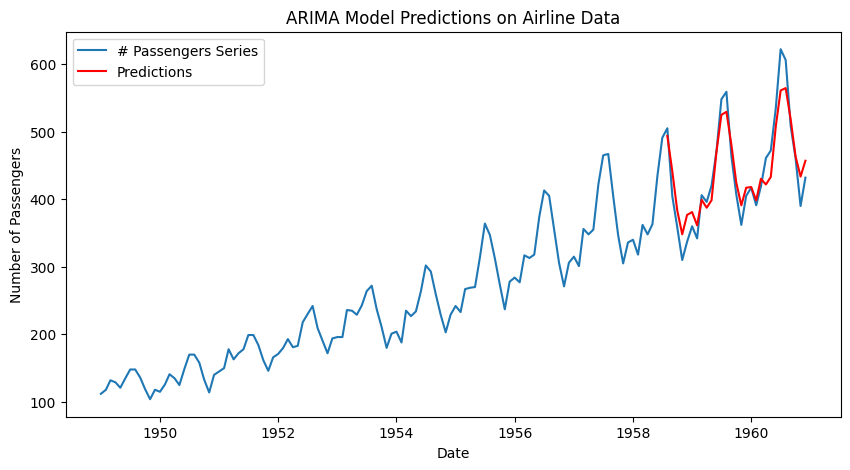

In [182]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df, label='# Passengers Series')
plt.plot(y_pred, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()